In [1]:
import json
import matplotlib.pyplot as plt
abstract_lengths = []
categories_list = []
N_samples = 100000

file_path = "data/arxiv-metadata-oai-snapshot.json"
with open(file_path, "r") as file:
    for article in file:
        try:
            article = json.loads(article)
            abstract = article.get('abstract', '')
            category = article.get('categories', '')
            categories = category.split()
            for cat in categories:
                if cat not in categories_list and len(categories_list) < N_samples:
                    categories_list.append(cat)
                    break
            
            if abstract:
                abstract_lengths.append(len(abstract))
        
            
            if len(abstract_lengths) == N_samples:
                break
        
        except json.JSONDecodeError:
            continue

categories_list.sort()
print("\nCategories List:")
for cat in categories_list:
    print(cat)


Categories List:
astro-ph
astro-ph.CO
astro-ph.EP
astro-ph.GA
astro-ph.HE
astro-ph.IM
astro-ph.SR
cond-mat.dis-nn
cond-mat.mes-hall
cond-mat.mtrl-sci
cond-mat.other
cond-mat.quant-gas
cond-mat.soft
cond-mat.stat-mech
cond-mat.str-el
cond-mat.supr-con
cs.AI
cs.AR
cs.CC
cs.CE
cs.CG
cs.CL
cs.CR
cs.CV
cs.CY
cs.DB
cs.DC
cs.DL
cs.DM
cs.DS
cs.ET
cs.FL
cs.GL
cs.GR
cs.GT
cs.HC
cs.IR
cs.IT
cs.LG
cs.LO
cs.MA
cs.MM
cs.MS
cs.NA
cs.NE
cs.NI
cs.OH
cs.OS
cs.PF
cs.PL
cs.RO
cs.SC
cs.SD
cs.SE
cs.SI
cs.SY
econ.EM
econ.TH
gr-qc
hep-ex
hep-lat
hep-ph
hep-th
math-ph
math.AC
math.AG
math.AP
math.AT
math.CA
math.CO
math.CT
math.CV
math.DG
math.DS
math.FA
math.GM
math.GN
math.GR
math.GT
math.HO
math.IT
math.KT
math.LO
math.MG
math.MP
math.NA
math.NT
math.OA
math.OC
math.PR
math.QA
math.RA
math.RT
math.SG
math.SP
math.ST
nlin.AO
nlin.CD
nlin.CG
nlin.PS
nlin.SI
nucl-ex
nucl-th
physics.acc-ph
physics.ao-ph
physics.app-ph
physics.atm-clus
physics.atom-ph
physics.bio-ph
physics.chem-ph
physics.class-ph
physics.comp

In [2]:
# Creating golden dataset: 1 paper for each category from ArXiv
golden_dataset = {}
categories_set = set(categories_list)
with open(file_path, "r") as file:
    for article in file:
        try:
            article = json.loads(article)
            id = article.get('id', '')
            title = article.get('title', '')
            abstract = article.get('abstract', '')
            category = article.get('categories', '')
            categories = category.split()
            for cat in categories:
                if cat in categories_set and cat not in golden_dataset:
                    golden_dataset[cat] = abstract
                    if len(golden_dataset) == len(categories_list):
                        break
            if len(golden_dataset) == len(categories_list):
                break
        except json.JSONDecodeError:
            continue

print("\nGolden Dataset:")
for cat, abstract in golden_dataset.items():
    print(f"Category: {cat}, Abstract Length: {len(abstract)}")



Golden Dataset:
Category: hep-ph, Abstract Length: 983
Category: math.CO, Abstract Length: 798
Category: cs.CG, Abstract Length: 798
Category: physics.gen-ph, Abstract Length: 880
Category: math.CA, Abstract Length: 223
Category: math.FA, Abstract Length: 223
Category: cond-mat.mes-hall, Abstract Length: 918
Category: gr-qc, Abstract Length: 1036
Category: cond-mat.mtrl-sci, Abstract Length: 949
Category: astro-ph, Abstract Length: 1716
Category: math.NT, Abstract Length: 340
Category: math.AG, Abstract Length: 340
Category: math.AT, Abstract Length: 168
Category: hep-th, Abstract Length: 385
Category: math.PR, Abstract Length: 175
Category: hep-ex, Abstract Length: 736
Category: nlin.PS, Abstract Length: 465
Category: physics.chem-ph, Abstract Length: 465
Category: q-bio.MN, Abstract Length: 465
Category: math.NA, Abstract Length: 1451
Category: cond-mat.str-el, Abstract Length: 655
Category: cond-mat.stat-mech, Abstract Length: 655
Category: math.RA, Abstract Length: 640
Category: p

(array([2.0260e+03, 6.2540e+03, 1.0887e+04, 1.5184e+04, 1.6139e+04,
        1.2982e+04, 1.0080e+04, 7.5180e+03, 5.6500e+03, 4.3370e+03,
        3.4370e+03, 2.7890e+03, 2.6720e+03, 3.8000e+01, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  20. ,  162.2,  304.4,  446.6,  588.8,  731. ,  873.2, 1015.4,
        1157.6, 1299.8, 1442. , 1584.2, 1726.4, 1868.6, 2010.8, 2153. ,
        2295.2, 2437.4, 2579.6, 2721.8, 2864. ]),
 <BarContainer object of 20 artists>)

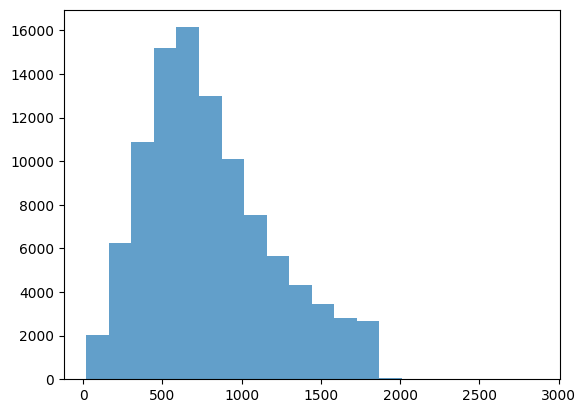

In [3]:
# Analyzing abstract lengths
plt.hist(abstract_lengths, bins=20, alpha=0.7)